<a href="https://colab.research.google.com/github/pankaj90382/TSAI/blob/master/S7/S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
S9_PROJECT_PATH = '/content/drive/My Drive/Colab Notebooks/Github_Repo/The_School_of_AI/TSAI/TSAI/S9'
sys.path.append(S9_PROJECT_PATH+'/S9_Modular_Code/')
import os
os.chdir(S9_PROJECT_PATH+'/S9_Modular_Code/')

In [0]:
from __future__ import print_function
import torch
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary
import pandas as pd
import numpy as np
from utils import *

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True)
# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Calculating Mean and Std dev
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
mean, std = get_meanstd(trainset, testset)

print(mean, std)


[0.49186878 0.48265391 0.44717728] [0.24697121 0.24338894 0.26159259]


In [7]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-noh6hs6w
All libraries are successfully installed!


In [0]:
from Album_Methods import Albumentations as AM

In [9]:
AM().transArguDetails("RandomRotate90", "HorizontalFlip", "ShiftScaleRotate", "GridDistortion", "Normalize")

RandomRotate90 : ArgSpec(args=['self', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(False, 0.5)) ,
HorizontalFlip : ArgSpec(args=['self', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(False, 0.5)) ,
ShiftScaleRotate : ArgSpec(args=['self', 'shift_limit', 'scale_limit', 'rotate_limit', 'interpolation', 'border_mode', 'value', 'mask_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(0.0625, 0.1, 45, 1, 4, None, None, False, 0.5)) ,
GridDistortion : ArgSpec(args=['self', 'num_steps', 'distort_limit', 'interpolation', 'border_mode', 'value', 'mask_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=(5, 0.3, 1, 4, None, None, False, 0.5)) ,
Normalize : ArgSpec(args=['self', 'mean', 'std', 'max_pixel_value', 'always_apply', 'p'], varargs=None, keywords=None, defaults=((0.485, 0.456, 0.406), (0.229, 0.224, 0.225), 255.0, False, 1.0)) ,


In [0]:
train_args= {
'RandomRotate90' : {},
'HorizontalFlip' : {},
'ShiftScaleRotate' : {'shift_limit':0.0625, 'scale_limit':0.2, 'rotate_limit':45, 'p':.2},
'GridDistortion' : {'num_steps':5},
'Normalize' : {'mean':mean, 'std':std}
}

test_args={
    'Normalize' : {'mean':mean, 'std':std}
}

In [0]:
# Train Phase transformations
train_transforms = AM().transform(**train_args)

# Test Phase transformations
test_transforms = AM().transform(**test_args)

In [12]:
from DataLoader import DataLoader

SEED = 1

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

# Creating object of a class
dataloader= DataLoader(shuffle=True, batch_size=64, seed=SEED, num_workers=2, pin_memory=True)


# train data loader
trainloader = dataloader.load(trainset)

# test data loader
testloader = dataloader.load(testset)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
# classes in cifar 10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32]) tensor([ 0.0440,  0.0007, -0.0253]) tensor([0.9578, 0.9465, 0.9527])
 ship plane truck plane plane  deer  frog  bird  bird  deer truck  deer horse plane  ship   dog   cat truck   dog   cat  bird plane horse  ship   dog   dog plane  ship  frog truck   car horse horse plane plane plane plane   car   cat truck


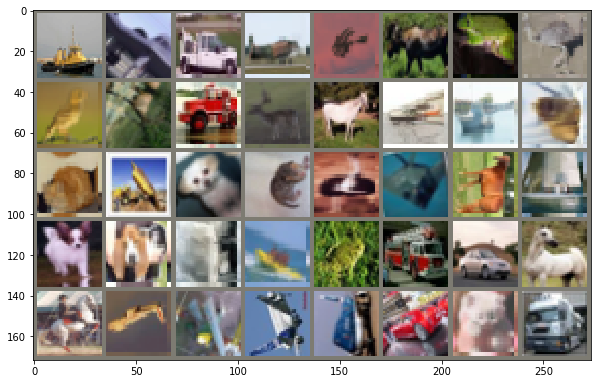

In [14]:
sample_images(trainloader, mean, std, classes, count=40)

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


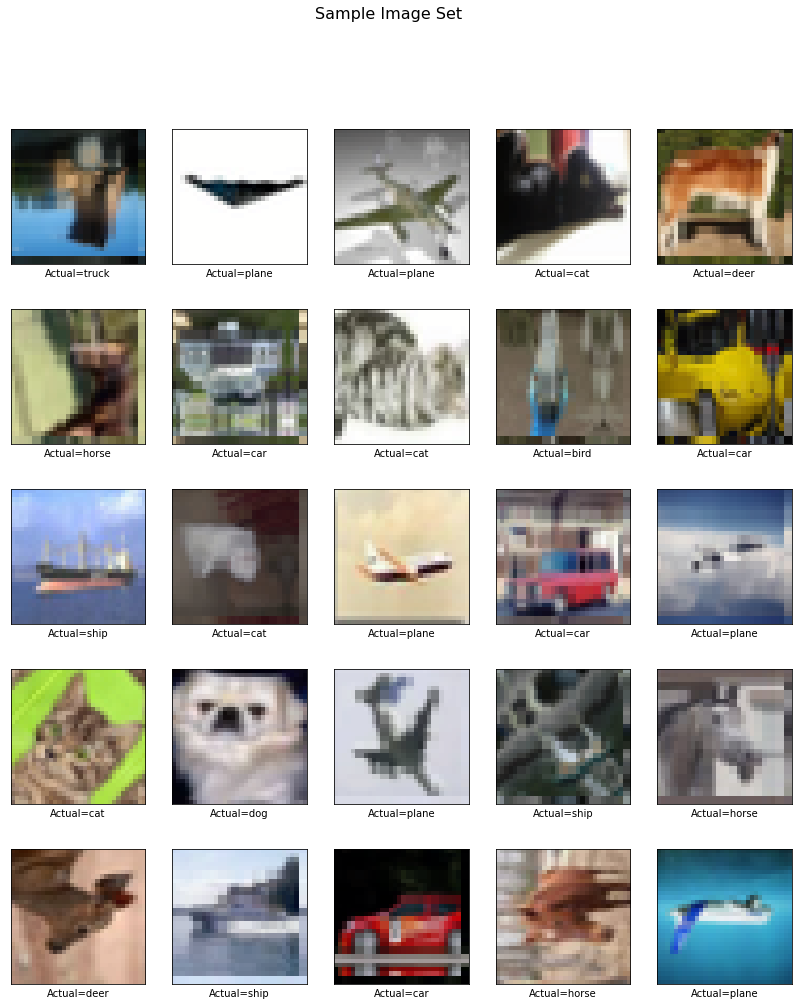

In [15]:
sample_images(trainloader, mean, std, classes, count=25, LabelClarity=True)

In [16]:
import torch.nn as nn
import torch.nn.functional as F
from Model import Resnet_Architecture
model = Resnet_Architecture(Model_Layers=18)
model.to(dataloader.device)
model.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [17]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
Loss="CrossEntropyLoss"
EPOCHS = 20
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=0.043, weight_decay=0.0019 ,momentum=0.9)
scheduler=StepLR(optimizer,step_size=5,gamma=0.1)
model.gotrain(optimizer=optimizer, train_loader=trainloader, test_loader=testloader, epochs=EPOCHS, statspath=S9_PROJECT_PATH+"/Save_Model/", scheduler=scheduler, batch_scheduler=False, L1lambda=0, LossType=Loss)

  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (100000.000000 --> 1.879489).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0294, Accuracy: 31.23%; Test set: Average loss: 1.8795, Accuracy: 44.34%
Learning Rate = 0.043000


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.879489 --> 1.624267).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0247, Accuracy: 42.55%; Test set: Average loss: 1.6243, Accuracy: 52.06%
Learning Rate = 0.043000


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.624267 --> 1.434174).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0216, Accuracy: 49.79%; Test set: Average loss: 1.4342, Accuracy: 57.73%
Learning Rate = 0.043000


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 4, Train set: Average loss: 0.0198, Accuracy: 55.04%; Test set: Average loss: 1.5472, Accuracy: 55.34%
Learning Rate = 0.043000


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.434174 --> 1.352099).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0189, Accuracy: 57.63%; Test set: Average loss: 1.3521, Accuracy: 63.91%
Learning Rate = 0.004300


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (1.352099 --> 0.740696).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0147, Accuracy: 67.09%; Test set: Average loss: 0.7407, Accuracy: 79.84%
Learning Rate = 0.004300


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.740696 --> 0.734437).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0134, Accuracy: 70.06%; Test set: Average loss: 0.7344, Accuracy: 79.87%
Learning Rate = 0.004300


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.734437 --> 0.712236).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0127, Accuracy: 71.78%; Test set: Average loss: 0.7122, Accuracy: 80.42%
Learning Rate = 0.004300


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.712236 --> 0.655018).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0122, Accuracy: 72.73%; Test set: Average loss: 0.6550, Accuracy: 82.51%
Learning Rate = 0.004300


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.655018 --> 0.644450).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0118, Accuracy: 73.86%; Test set: Average loss: 0.6444, Accuracy: 82.55%
Learning Rate = 0.000430


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.644450 --> 0.537039).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0104, Accuracy: 77.13%; Test set: Average loss: 0.5370, Accuracy: 85.77%
Learning Rate = 0.000430


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.537039 --> 0.511356).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0099, Accuracy: 78.38%; Test set: Average loss: 0.5114, Accuracy: 85.92%
Learning Rate = 0.000430


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.511356 --> 0.506709).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0096, Accuracy: 78.74%; Test set: Average loss: 0.5067, Accuracy: 86.30%
Learning Rate = 0.000430


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.506709 --> 0.501415).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0095, Accuracy: 79.29%; Test set: Average loss: 0.5014, Accuracy: 86.80%
Learning Rate = 0.000430


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.501415 --> 0.486262).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0092, Accuracy: 79.90%; Test set: Average loss: 0.4863, Accuracy: 86.94%
Learning Rate = 0.000043


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.486262 --> 0.478332).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0090, Accuracy: 80.16%; Test set: Average loss: 0.4783, Accuracy: 87.22%
Learning Rate = 0.000043


  0%|          | 0/782 [00:00<?, ?it/s]

Validation loss decreased (0.478332 --> 0.476386).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0089, Accuracy: 80.66%; Test set: Average loss: 0.4764, Accuracy: 87.13%
Learning Rate = 0.000043


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 18, Train set: Average loss: 0.0089, Accuracy: 80.55%; Test set: Average loss: 0.4818, Accuracy: 87.03%
Learning Rate = 0.000043


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 19, Train set: Average loss: 0.0089, Accuracy: 80.63%; Test set: Average loss: 0.4770, Accuracy: 87.26%
Learning Rate = 0.000043


Batch=15640 Loss=1.1150 Acc=80.65%: 100%|██████████| 782/782 [01:01<00:00, 12.69it/s]


Validation loss decreased (0.476386 --> 0.473796).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0088, Accuracy: 80.65%; Test set: Average loss: 0.4738, Accuracy: 87.41%
Learning Rate = 0.000004



In [0]:
#model.device=dataloader.device
#model = model_builder(model_class=Resnet_Architecture, weights_path=S9_PROJECT_PATH+'/Save_Model/Model.pt', local_device=model.device)

In [19]:
class_acurracy(model, model.device, trainloader, classes)

Accuracy of plane : 85 %
Accuracy of   car : 90 %
Accuracy of  bird : 76 %
Accuracy of   cat : 66 %
Accuracy of  deer : 80 %
Accuracy of   dog : 74 %
Accuracy of  frog : 86 %
Accuracy of horse : 83 %
Accuracy of  ship : 88 %
Accuracy of truck : 87 %


In [0]:
MisClassifiedImages, MisClassifiedPredLabels, MisClassifiedTargLabels = get_classified_images(model, model.device, testloader, classification='Miss')

In [0]:
CorrClassifiedImages, CorrClassifiedPredLabels, CorrClassifiedTargLabels = get_classified_images(model, model.device, testloader, classification='Corr')

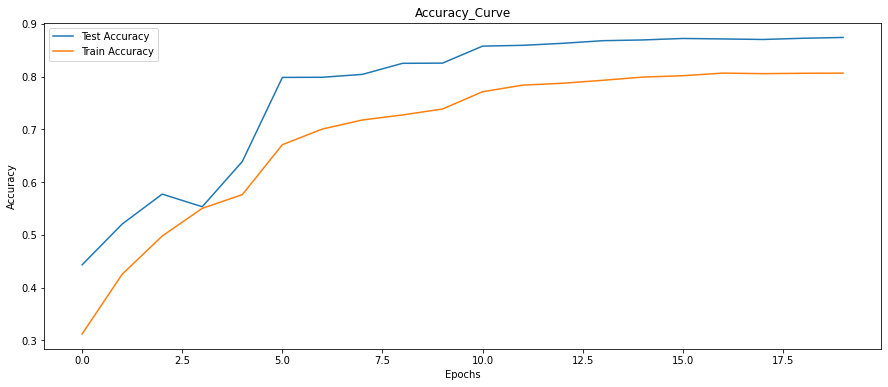

In [22]:
#cols = ["batch_train_loss", "batch_train_acc", "batch_lr","avg_test_loss", "test_acc", "train_acc", "avg_train_loss", "lr", "best_test_loss", "epochs"]
plot_graph(load_path=S9_PROJECT_PATH+'/Save_Model/Model_stats.json', cols=["test_acc", "train_acc"], legend_arr=['Test Accuracy', 'Train Accuracy'], xlabel='Epochs', ylabel='Accuracy', title='Accuracy_Curve', save_path=S9_PROJECT_PATH+'/Save_Model/')

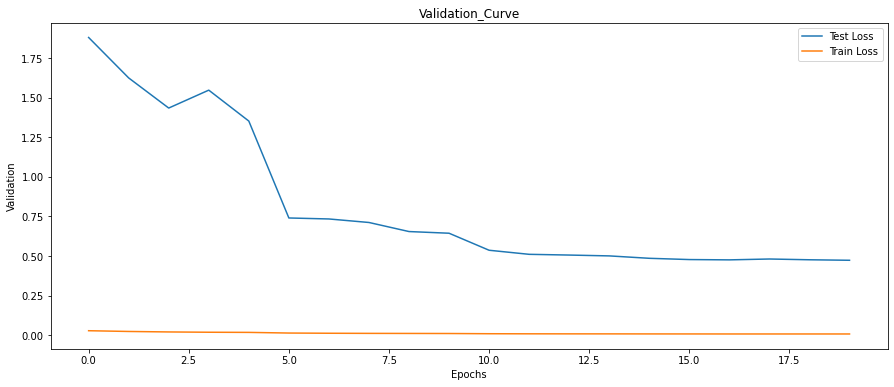

In [23]:
plot_graph(load_path=S9_PROJECT_PATH+'/Save_Model/Model_stats.json', cols=["avg_test_loss","avg_train_loss"], legend_arr=['Test Loss', 'Train Loss'], xlabel='Epochs', ylabel='Validation', title='Validation_Curve', save_path=S9_PROJECT_PATH+'/Save_Model/')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


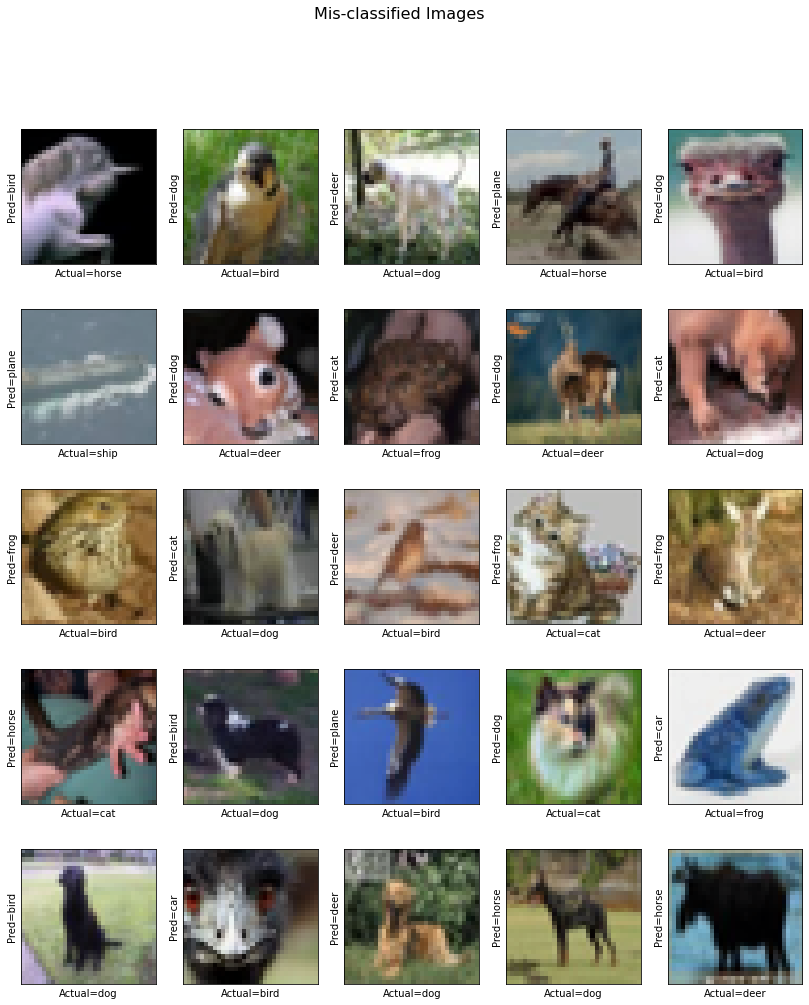

In [24]:
show_classified(MisClassifiedImages, MisClassifiedPredLabels, MisClassifiedTargLabels, classes, mean, std,"Mis-classified Images",S9_PROJECT_PATH+'/Save_Model/',25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


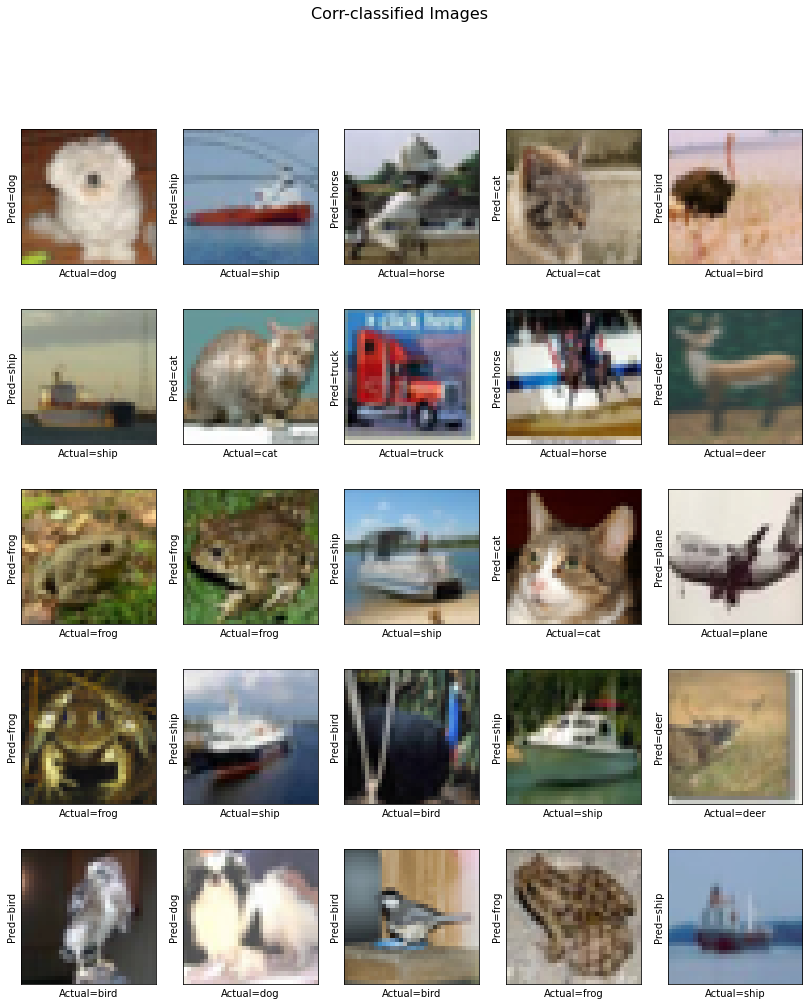

In [25]:
show_classified(CorrClassifiedImages, CorrClassifiedPredLabels, CorrClassifiedTargLabels, classes, mean, std,"Corr-classified Images",S9_PROJECT_PATH+'/Save_Model/',25)

In [0]:
from GradCam import VisualizeCam

In [0]:
target_layers = ["resnet_arch.layer1", "resnet_arch.layer2", "resnet_arch.layer3", "resnet_arch.layer4"]
viz_cam = VisualizeCam(model, classes, target_layers)

torch.Size([25, 10])
Generating Grad-CAM @resnet_arch.layer1
Generating Grad-CAM @resnet_arch.layer2
Generating Grad-CAM @resnet_arch.layer3
Generating Grad-CAM @resnet_arch.layer4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

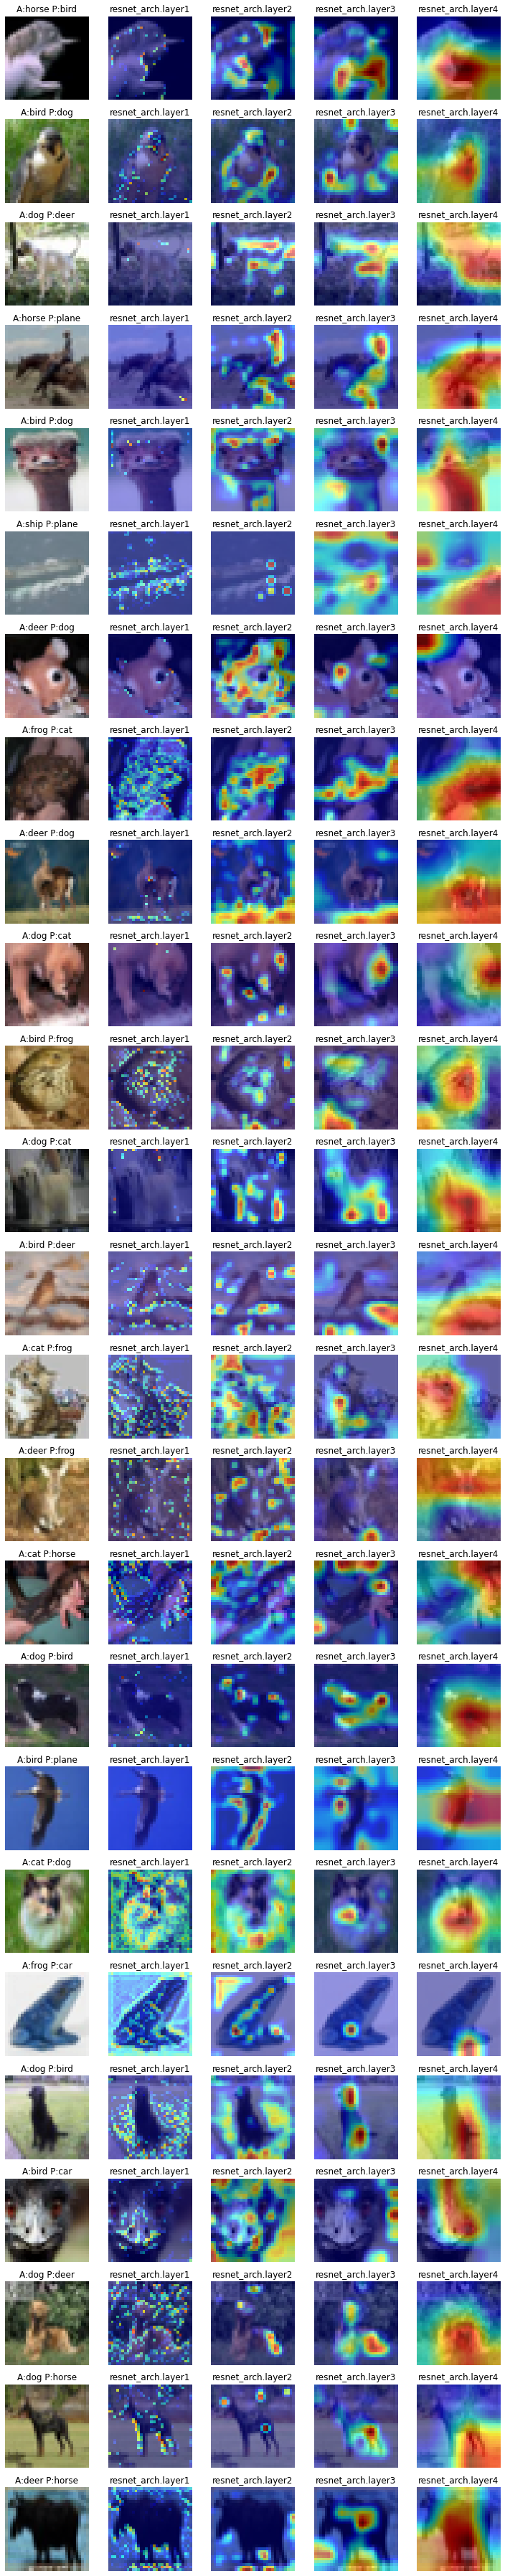

In [28]:
viz_cam(MisClassifiedImages[:25], MisClassifiedTargLabels[:25], target_layers, mean, std, target_inds=MisClassifiedTargLabels[:25], metric="Incorrect", per_image=False, path=S9_PROJECT_PATH+"/Save_Model/")

torch.Size([25, 10])
Generating Grad-CAM @resnet_arch.layer1
Generating Grad-CAM @resnet_arch.layer2
Generating Grad-CAM @resnet_arch.layer3
Generating Grad-CAM @resnet_arch.layer4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

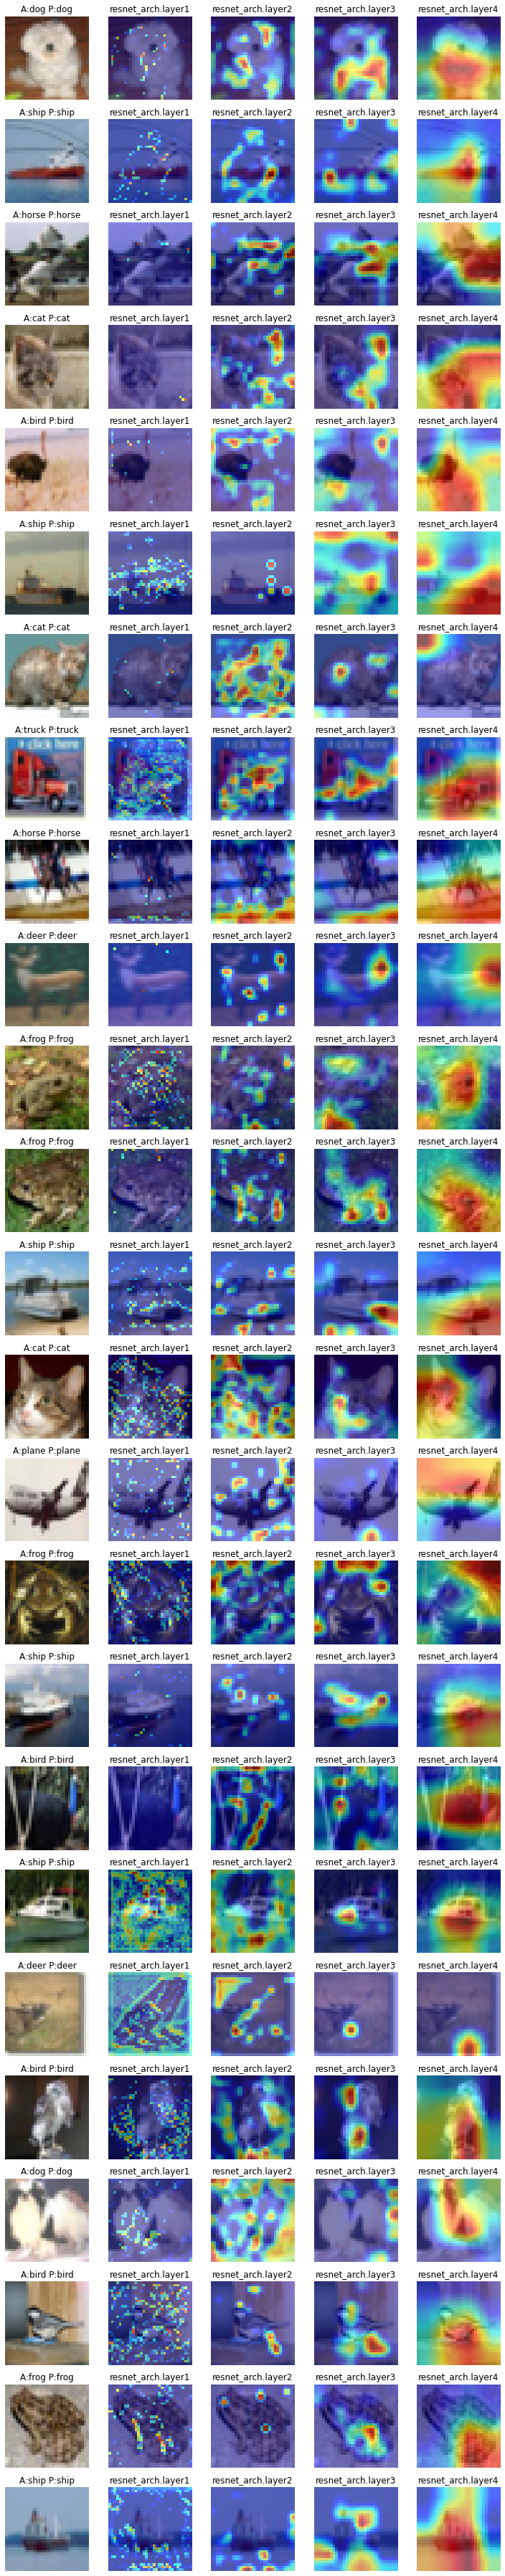

In [29]:
viz_cam(CorrClassifiedImages[:25], CorrClassifiedTargLabels[:25], target_layers, mean, std, target_inds=None, metric="Correct", per_image=False, path=S9_PROJECT_PATH+"/Save_Model/")